In [ ]:
import requests
import pandas as pd

# NSE API URL for Nifty 200 stocks
nifty_200_url = "https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%20200"

headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en",
    "Referer": "https://www.nseindia.com/",
}

# Start session and get cookies
session = requests.Session()
session.get("https://www.nseindia.com", headers=headers)

# Fetch stock data
response = session.get(nifty_200_url, headers=headers)
data = response.json()

# Extract symbols and filter out index entries
tickers = [stock["symbol"] + ".NS" for stock in data["data"] if "NIFTY" not in stock["symbol"]]

# Save to CSV
pd.DataFrame(tickers, columns=["Ticker"]).to_csv("nifty_200_tickers.csv", index=False)

print(f"Filtered Tickers Count: {len(tickers)}")
print(tickers[:10])  # Show first 10 valid stock tickers


Filtered Tickers Count: 200
['PAYTM.NS', 'ZOMATO.NS', 'POLICYBZR.NS', 'IREDA.NS', 'POONAWALLA.NS', 'TORNTPOWER.NS', 'VBL.NS', 'FACT.NS', 'GAIL.NS', 'INDHOTEL.NS']


In [ ]:
import yfinance as yf
import pandas as pd

# Load Nifty 200 tickers from CSV
tickers_df = pd.read_csv("nifty_200_tickers.csv")
tickers = tickers_df["Ticker"].tolist()

fundamental_data = []

# Loop through each stock ticker
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        info = stock.info  # Fetch stock fundamentals

        # Extract relevant data
        fundamental_data.append({
            "Ticker": ticker,
            "Market Cap": info.get("marketCap"),
            "P/E Ratio": info.get("trailingPE"),
            "P/B Ratio": info.get("priceToBook"),
            "ROE": info.get("returnOnEquity"),
            "Debt/Equity": info.get("debtToEquity"),
            "Beta": info.get("beta"),
            "52-Week High": info.get("fiftyTwoWeekHigh"),
            "52-Week Low": info.get("fiftyTwoWeekLow")
        })
        print(f"Fetched data for {ticker}")

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert to DataFrame
df = pd.DataFrame(fundamental_data)

# Save to CSV
df.to_csv("nifty_200_fundamentals.csv", index=False)

print("Data fetched successfully!")
df


Fetched data for PAYTM.NS
Fetched data for ZOMATO.NS
Fetched data for POLICYBZR.NS
Fetched data for IREDA.NS
Fetched data for POONAWALLA.NS
Fetched data for TORNTPOWER.NS
Fetched data for VBL.NS
Fetched data for FACT.NS
Fetched data for GAIL.NS
Fetched data for INDHOTEL.NS
Fetched data for UNIONBANK.NS
Fetched data for BSE.NS
Fetched data for LODHA.NS
Fetched data for BHEL.NS
Fetched data for BANKINDIA.NS
Fetched data for CGPOWER.NS
Fetched data for HAL.NS
Fetched data for JSWENERGY.NS
Fetched data for DELHIVERY.NS
Fetched data for ABB.NS
Fetched data for HAVELLS.NS
Fetched data for MPHASIS.NS
Fetched data for BOSCHLTD.NS
Fetched data for MOTHERSON.NS
Fetched data for NLCINDIA.NS
Fetched data for CHOLAFIN.NS
Fetched data for IOB.NS
Fetched data for COCHINSHIP.NS
Fetched data for SIEMENS.NS
Fetched data for LICHSGFIN.NS
Fetched data for TATAPOWER.NS
Fetched data for MAHABANK.NS
Fetched data for IDFCFIRSTB.NS
Fetched data for MFSL.NS
Fetched data for DIXON.NS
Fetched data for ICICIBANK.N

,Ticker,Market Cap,P/E Ratio,P/B Ratio,ROE,Debt/Equity,Beta,52-Week High,52-Week Low
0,PAYTM.NS,472829362176,NaN,3.246045,NaN,1.144,-0.842,1062.95,310.00
1,ZOMATO.NS,1979439382528,290.920000,8.926847,NaN,5.439,0.259,304.70,146.30
2,POLICYBZR.NS,666658996224,275.378780,10.770849,NaN,5.473,0.470,2246.90,1090.00
3,IREDA.NS,392278540288,25.560420,4.209448,NaN,586.184,NaN,310.00,124.40
4,POONAWALLA.NS,236709806080,141.129030,2.950158,NaN,225.886,1.311,514.00,267.20
...,...,...,...,...,...,...,...,...,...
195,SRF.NS,886281076736,77.579130,7.392746,NaN,43.730,0.649,3038.50,2089.10
196,MANKIND.NS,885779791872,42.240158,8.136568,NaN,4.468,NaN,3054.80,1901.05
197,BAJAJFINSV.NS,2942272274432,34.706490,4.301096,NaN,211.987,1.184,2029.90,1419.05
198,MRPL.NS,201662480384,24.434042,1.634059,NaN,109.967,0.939,259.90,98.92


In [ ]:
import yfinance as yf
import pandas as pd

# Load Nifty 200 tickers
tickers_df = pd.read_csv("nifty_200_tickers.csv")
tickers = tickers_df["Ticker"].tolist()

fundamental_data = []

# Define the date range (quarters)
start_date = "2024-03-01"
end_date = "2025-03-01"

# Loop through each stock ticker
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)

        # Fetch financial statements (quarterly)
        income_stmt = stock.quarterly_financials
        balance_sheet = stock.quarterly_balance_sheet
        cash_flow = stock.quarterly_cashflow

        # Extract key fundamentals
        revenue = income_stmt.loc["Total Revenue"].max() if "Total Revenue" in income_stmt.index else None
        net_income = income_stmt.loc["Net Income"].max() if "Net Income" in income_stmt.index else None
        total_assets = balance_sheet.loc["Total Assets"].max() if "Total Assets" in balance_sheet.index else None
        total_liabilities = balance_sheet.loc["Total Liabilities"].max() if "Total Liabilities" in balance_sheet.index else None
        operating_cash_flow = cash_flow.loc["Total Cash From Operating Activities"].max() if "Total Cash From Operating Activities" in cash_flow.index else None

        # Compute fundamental ratios
        roe = net_income / total_assets if net_income and total_assets else None
        debt_to_equity = total_liabilities / (total_assets - total_liabilities) if total_assets and total_liabilities else None
        fcf_yield = operating_cash_flow / total_assets if operating_cash_flow and total_assets else None

        # Append data
        fundamental_data.append({
            "Ticker": ticker,
            "Revenue": revenue,
            "Net Income": net_income,
            "Total Assets": total_assets,
            "Total Liabilities": total_liabilities,
            "ROE": roe,
            "Debt/Equity": debt_to_equity,
            "Free Cash Flow Yield": fcf_yield
        })

        print(f"Fetched quarterly financials for {ticker}")

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert to DataFrame
df_fundamentals = pd.DataFrame(fundamental_data)

# Save to CSV
df_fundamentals.to_csv("nifty_200_fundamentals_quarterly.csv", index=False)

print("Quarterly financial data fetched successfully!")
print(df_fundamentals.head())


Fetched quarterly financials for PAYTM.NS
Fetched quarterly financials for ZOMATO.NS
Fetched quarterly financials for POLICYBZR.NS
Fetched quarterly financials for IREDA.NS
Fetched quarterly financials for POONAWALLA.NS
Fetched quarterly financials for TORNTPOWER.NS
Fetched quarterly financials for VBL.NS
Fetched quarterly financials for FACT.NS
Fetched quarterly financials for GAIL.NS
Fetched quarterly financials for INDHOTEL.NS
Fetched quarterly financials for UNIONBANK.NS
Fetched quarterly financials for BSE.NS
Fetched quarterly financials for LODHA.NS
Fetched quarterly financials for BHEL.NS
Fetched quarterly financials for BANKINDIA.NS
Fetched quarterly financials for CGPOWER.NS
Fetched quarterly financials for HAL.NS
Fetched quarterly financials for JSWENERGY.NS
Fetched quarterly financials for DELHIVERY.NS
Fetched quarterly financials for ABB.NS
Fetched quarterly financials for HAVELLS.NS
Fetched quarterly financials for MPHASIS.NS
Fetched quarterly financials for BOSCHLTD.NS
Fe

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load both datasets
df1 = pd.read_csv("nifty_200_fundamentals.csv")  # First code block (Market Cap, P/E, etc.)
df2 = pd.read_csv("nifty_200_fundamentals_quarterly.csv")  # Second code block (Revenue, ROE, etc.)

# Merge the two datasets on 'Ticker'
df = pd.merge(df1, df2, on="Ticker", how="inner")  # Inner join to keep common tickers

# Select only the required columns for clustering
num_cols = [
    "Market Cap", "P/E Ratio", "P/B Ratio", "Beta", "52-Week High", "52-Week Low",
    "Revenue", "Net Income", "Total Assets"
]
# Add Debt/Equity and ROE if they exist in df after the merge
if "Debt/Equity" in df.columns:
    num_cols.append("Debt/Equity")
if "ROE" in df.columns:
    num_cols.append("ROE")

# Convert columns to numeric safely
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Fill NaN values with 0
df[num_cols] = df[num_cols].fillna(0)

# Standardize numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Apply PCA (retain 5 components)
pca = PCA(n_components=5)
pca_features = pca.fit_transform(df[num_cols])

# Get PCA loadings (feature importance in principal components)
loadings = pd.DataFrame(pca.components_, columns=num_cols, index=[f'PC{i+1}' for i in range(5)])

# Print explained variance for each component
print("Explained Variance by PCA Components:")
print(pca.explained_variance_ratio_)
print("\nFeature Contributions (PCA Loadings):")
print(loadings.T)  # Transpose to view features as rows

# Identify most important features for each principal component
top_features_per_pc = loadings.abs().idxmax()
print("\nTop Contributing Feature per Principal Component:")
print(top_features_per_pc)

# Identify redundant features (low absolute weight across all PCs)
redundant_features = loadings.abs().max(axis=0).sort_values()
print("\nPotential Redundant Features (Lowest Contribution):")
print(redundant_features.head(3))  # Show top 3 least important features




Explained Variance by PCA Components:
[0.32870805 0.2202751  0.13278995 0.1147375  0.08850301]

Feature Contributions (PCA Loadings):
                   PC1       PC2       PC3       PC4       PC5
Market Cap    0.465250  0.117089 -0.257108  0.146032 -0.035201
P/E Ratio    -0.126358 -0.039730 -0.566485 -0.416141  0.696546
P/B Ratio     0.013752  0.018254 -0.417030  0.842072  0.172584
Beta          0.094435 -0.096337  0.656504  0.238822  0.681001
52-Week High -0.123700  0.690678  0.055939 -0.000611  0.063276
52-Week Low  -0.116234  0.692657  0.056694 -0.002513  0.061323
Revenue       0.475226  0.075091  0.022530 -0.093192  0.106587
Net Income    0.541665  0.090974 -0.027928 -0.067559 -0.017272
Total Assets  0.458712  0.066132  0.021163 -0.161634  0.024778

Top Contributing Feature per Principal Component:
Market Cap      PC1
P/E Ratio       PC5
P/B Ratio       PC4
Beta            PC5
52-Week High    PC2
52-Week Low     PC2
Revenue         PC1
Net Income      PC1
Total Assets    PC1
dtype

In [ ]:
from sklearn.cluster import KMeans
#Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 20)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(pca_features)
  inertia.append(kmeans.inertia_)

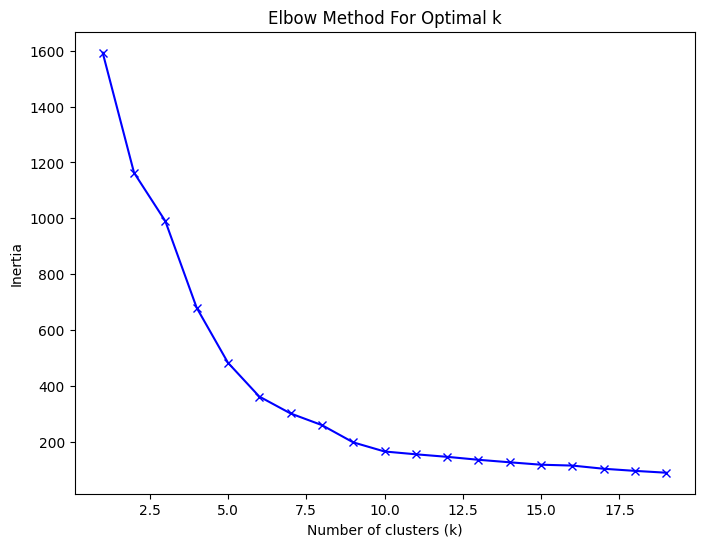

In [ ]:
import matplotlib.pyplot as plt
# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show();
#this code is fair game for a quiz

In [ ]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=10, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(pca_features)

# Save processed data
df.to_csv("nifty_200_processed_final.csv", index=False)
print("\n Data processing complete and saved!")

# Display the companies grouped by their assigned cluster
for cluster in sorted(df["Cluster"].unique()):
    print(f"\n Cluster {cluster}:")
    print(df[df["Cluster"] == cluster][["Ticker"]].to_string(index=False))

# Count the number of companies in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

print("\n Number of Companies in Each Cluster:")
print(cluster_counts)
df


 Data processing complete and saved!

 Cluster 0:
       Ticker
     PAYTM.NS
    ZOMATO.NS
 POLICYBZR.NS
     IREDA.NS
  INDHOTEL.NS
     LODHA.NS
 JSWENERGY.NS
  TATATECH.NS
  GODREJCP.NS
      IRFC.NS
    JIOFIN.NS
ASIANPAINT.NS
  TVSMOTOR.NS
    MARICO.NS
    COLPAL.NS
   ESCORTS.NS
TORNTPHARM.NS
       BEL.NS
  DIVISLAB.NS
 MAXHEALTH.NS
INDUSTOWER.NS
  JSWINFRA.NS
  SONACOMS.NS
      SJVN.NS
HINDUNILVR.NS
KALYANKJIL.NS
  JUBLFOOD.NS
 AMBUJACEM.NS
 POWERGRID.NS
 NESTLEIND.NS
    BIOCON.NS
     CIPLA.NS
 PATANJALI.NS
   DRREDDY.NS
      NHPC.NS
    VOLTAS.NS
     ABFRL.NS
     DABUR.NS
     DMART.NS
 SOLARINDS.NS
   SBICARD.NS
PIDILITIND.NS
   MANKIND.NS
BHARTIHEXA.NS

 Cluster 1:
     Ticker
    SBIN.NS
    LICI.NS
HDFCBANK.NS
RELIANCE.NS

 Cluster 2:
      Ticker
DELHIVERY.NS
    NYKAA.NS

 Cluster 3:
    Ticker
   INFY.NS
HCLTECH.NS

 Cluster 4:
Ticker
MRF.NS

 Cluster 5:
       Ticker
TORNTPOWER.NS
       VBL.NS
      FACT.NS
       BSE.NS
       ABB.NS
   HAVELLS.NS
   MPHASIS

,Ticker,Market Cap,P/E Ratio,P/B Ratio,ROE_x,Debt/Equity_x,Beta,52-Week High,52-Week Low,Revenue,Net Income,Total Assets,Total Liabilities,ROE_y,Debt/Equity_y,Free Cash Flow Yield,Cluster
0,PAYTM.NS,-0.484016,-0.507283,-0.169576,NaN,1.144,-4.017127,-0.232336,-0.255189,-0.403194,-0.330249,-0.314227,NaN,0.048470,NaN,NaN,0
1,ZOMATO.NS,0.223175,2.327162,-0.072164,NaN,5.439,-1.112903,-0.298989,-0.275712,-0.328353,-0.520465,-0.306520,NaN,0.010038,NaN,NaN,0
2,POLICYBZR.NS,-0.393034,2.175743,-0.040543,NaN,5.473,-0.556326,-0.128261,-0.157400,-0.448865,-0.571578,-0.329505,NaN,0.010001,NaN,NaN,0
3,IREDA.NS,-0.521826,-0.258247,-0.153056,NaN,586.184,-1.796095,-0.298523,-0.278458,-0.437753,-0.471910,-0.251075,NaN,0.006187,NaN,NaN,0
4,POONAWALLA.NS,-0.594849,0.867743,-0.174650,NaN,225.886,1.662068,-0.280591,-0.260555,-0.455846,-0.498385,-0.304231,NaN,0.012273,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,SRF.NS,-0.289945,0.248574,-0.098470,NaN,43.730,-0.084159,-0.058676,-0.032143,-0.383992,-0.472803,-0.311776,NaN,0.020032,NaN,NaN,5
196,MANKIND.NS,-0.290181,-0.095735,-0.085715,NaN,4.468,-1.796095,-0.057243,-0.055719,-0.392075,-0.407662,-0.320810,NaN,0.046736,NaN,NaN,0
197,BAJAJFINSV.NS,0.675122,-0.169136,-0.151484,NaN,211.987,1.327067,-0.147336,-0.116147,0.438528,0.036692,0.426902,NaN,0.003711,NaN,NaN,6
198,MRPL.NS,-0.611300,-0.269221,-0.197218,NaN,109.967,0.680804,-0.302927,-0.281652,0.254332,-0.271037,-0.293294,NaN,0.031988,NaN,NaN,8


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Step 1: Download historical data

daily_prices = yf.download(tickers, start='2022-03-01', end='2025-03-01')['Close']

# Step 2: Calculate daily returns
returns = daily_prices.pct_change(fill_method=None)
returns.to_csv("datafile.csv")
# Check the fetched data
print(returns.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  200 of 200 completed


Ticker        ABB.NS  ABCAPITAL.NS  ABFRL.NS    ACC.NS  ADANIENSOL.NS  \
Date                                                                    
2022-03-02       NaN           NaN       NaN       NaN            NaN   
2022-03-03 -0.009063     -0.015737 -0.020161 -0.054044            NaN   
2022-03-04 -0.001875      0.000000 -0.011036  0.027889            NaN   
2022-03-07 -0.021550     -0.044574 -0.011349 -0.030041            NaN   
2022-03-08  0.012376      0.015213  0.018940  0.006128            NaN   

Ticker      ADANIENT.NS  ADANIGREEN.NS  ADANIPORTS.NS  ADANIPOWER.NS  \
Date                                                                   
2022-03-02          NaN            NaN            NaN            NaN   
2022-03-03     0.001218       0.036307      -0.005068      -0.003249   
2022-03-04    -0.017520      -0.029012      -0.009268      -0.024042   
2022-03-07    -0.031548      -0.047801      -0.031922      -0.027557   
2022-03-08     0.024008      -0.010977       0.016303   

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Load clustered data (contains "Ticker" and "Cluster")
df_clusters = pd.read_csv("nifty_200_processed_final.csv")

# Load daily returns of all stocks
df_daily_returns = pd.read_csv("datafile.csv", index_col=0, parse_dates=True)

# Merge daily returns with cluster information
df_clustered_returns = df_daily_returns.T  # Transpose so tickers are rows
df_clustered_returns = df_clustered_returns.merge(df_clusters[["Ticker", "Cluster"]], left_index=True, right_on="Ticker")

# Group by Cluster and compute the average daily return for each cluster
df_avg_cluster_returns = df_clustered_returns.drop(columns=["Ticker"]).groupby("Cluster").mean().T

# Save the results
df_avg_cluster_returns.to_csv("cluster_daily_returns.csv")

# Display the first few rows
#print(df_avg_cluster_returns.head())
df_avg_cluster_returns


Cluster,0,1,2,3,4,5,6,7,8,9
2022-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-03 00:00:00,-0.007076,-0.008417,0.065024,0.016124,-0.002845,-0.004544,-0.000593,0.002687,0.002318,-0.021050
2022-03-04 00:00:00,-0.018873,-0.012374,0.003490,0.000163,-0.001880,-0.018353,-0.015767,-0.022486,-0.022869,-0.020301
2022-03-07 00:00:00,-0.023112,-0.038121,-0.107608,0.011719,0.003669,-0.017991,-0.027677,0.006486,-0.027293,-0.029871
2022-03-08 00:00:00,0.012471,0.000152,0.009909,0.020162,0.003654,0.013526,0.012523,0.009423,0.011072,0.017600
...,...,...,...,...,...,...,...,...,...,...
2025-02-21 00:00:00,-0.005917,-0.001405,-0.007016,0.001116,-0.006143,-0.011439,-0.010539,-0.009777,-0.009133,-0.004238
2025-02-24 00:00:00,-0.011858,-0.008743,-0.002224,-0.030677,-0.003856,-0.007730,-0.007616,-0.017298,-0.011448,-0.005174
2025-02-25 00:00:00,-0.002059,-0.009386,-0.022047,-0.001397,-0.015050,-0.008073,-0.003935,-0.001916,-0.008884,0.007139
2025-02-27 00:00:00,-0.007026,-0.004197,-0.018708,-0.003070,-0.013811,-0.014020,-0.003272,-0.007949,-0.002543,-0.003386


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define risk-free rate (10-Year Indian Government Bond yield as of March 2025)
risk_free_rate = 6.796 / 100

# Load required data
df_clusters = pd.read_csv("nifty_200_processed_final.csv")  # Cluster and Ticker information
df_avg_cluster_returns = pd.read_csv("cluster_daily_returns.csv", index_col=0, parse_dates=True)  # Cluster returns
df_beta = pd.read_csv("nifty_200_fundamentals.csv")

df_beta = df_beta[["Ticker", "Beta"]]

# Ensure column names are stripped of extra spaces
df_beta.columns = df_beta.columns.str.strip()

# Verify column names
print(df_beta.columns)


Index(['Ticker', 'Beta'], dtype='object')


In [ ]:
# Check if 'Beta' is already in df_clusters
print("df_clusters columns:", df_clusters.columns)
print("df_beta columns:", df_beta.columns)

# Rename 'Beta' in df_beta to avoid conflicts
df_beta = df_beta.rename(columns={"Beta": "Beta_new"})

# Merge and calculate cluster betas
df_cluster_betas = (
    df_clusters.merge(df_beta, on="Ticker", how="left")  # Left join to keep all tickers
    .groupby("Cluster")["Beta_new"]
    .mean()
)

print(df_cluster_betas)


df_clusters columns: Index(['Ticker', 'Market Cap', 'P/E Ratio', 'P/B Ratio', 'ROE_x',
       'Debt/Equity_x', 'Beta', '52-Week High', '52-Week Low', 'Revenue',
       'Net Income', 'Total Assets', 'Total Liabilities', 'ROE_y',
       'Debt/Equity_y', 'Free Cash Flow Yield', 'Cluster'],
      dtype='object')
df_beta columns: Index(['Ticker', 'Beta'], dtype='object')
Cluster
0    0.259605
1    0.686000
2    0.083000
3    0.617500
4    0.380000
5    0.663714
6    0.776222
7    0.772833
8    1.174805
9    0.523000
Name: Beta_new, dtype: float64


In [ ]:
# Define risk-free rate (10-Year Indian Government Bond yield as of March 2025)
risk_free_rate = 6.796 / 100

#Step 3: Calculate the mean returns and the covariance matrix
mean_returns = df_avg_cluster_returns.mean()
cov_matrix = df_avg_cluster_returns.cov()

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
  portfolio_return = np.dot(weights, mean_returns) #Expected portfolio return
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) #Portfolio
  sharpe_ratio= (portfolio_return - risk_free_rate) / portfolio_volatility #Sharpe ratio
  reward_to_risk_ratio = portfolio_return / portfolio_volatility #Reward to risk ratio
  treynor_ratio= (portfolio_return - risk_free_rate) / weights.mean() #Treynor ratio
  return portfolio_return, portfolio_volatility, sharpe_ratio

#Function to maximize (Sharpe ratio)
def max_sharpe_ratio(weights, mean_returns, cov_matrix0):
  return portfolio_performance(weights, mean_returns, cov_matrix)[2] #Maximize Sharpe Ratio

#Function to ensure weights sum to 1
def check_sum(weights):
  return np.sum(weights) - 1

#Step 4: Optimize Portfolio
def optimize_portfolio(mean_returns, cov_matrix):
  num_assets = len(mean_returns)
  args = (mean_returns, cov_matrix)
  constraints = {'type': 'eq', 'fun': check_sum} #Weights sum to 1
  bounds = [(0,1)] * num_assets #Weight bounds (0 to 1 for each asset)
  result = minimize(max_sharpe_ratio, num_assets * [1. / num_assets], args=args,
                    method='SLSQP', bounds = bounds, constraints = constraints)
  return result

  #Run the optimization to find optimal weights
optimal_weights = optimize_portfolio(mean_returns, cov_matrix)['x']

#Display the optimal weights
portfolio_df = pd.DataFrame({
    'Cluster': ['0','1','2','3','4','5','6','7','8','9'],
    'Optimal Weight': optimal_weights
})

print("Optimal Portfolio Weights:")
portfolio_df


Optimal Portfolio Weights:


,Cluster,Optimal Weight
0,0,2.016012e-01
1,1,9.393233e-02
2,2,0.000000e+00
3,3,1.586463e-01
4,4,1.225757e-01
5,5,0.000000e+00
6,6,0.000000e+00
7,7,1.800931e-01
8,8,7.812323e-16
9,9,2.431514e-01


In [ ]:
import numpy as np
import pandas as pd

# Load cluster daily returns
df_avg_cluster_returns = pd.read_csv("cluster_daily_returns.csv", index_col=0, parse_dates=True)

# Compute mean returns and covariance matrix
mean_returns = df_avg_cluster_returns.mean()
cov_matrix = df_avg_cluster_returns.cov()

# Risk-free rate assumption (adjust based on actual market rates)
risk_free_rate = 0.06797 / 252  # Converting annualized 5% rate to daily

# Compute standard deviation (volatility) of each cluster
std_deviation = df_avg_cluster_returns.std()

#Return to Risk Ratio
return_to_risk = mean_returns / std_deviation

# Compute Sharpe Ratio for each cluster
sharpe_ratios = (mean_returns - risk_free_rate) / std_deviation

# Compute Beta of each cluster (Market proxy: Equal-weighted market return)
market_return = df_avg_cluster_returns.mean(axis=1)
beta_values = df_avg_cluster_returns.cov().apply(lambda x: x / market_return.var())

# Compute Treynor Ratio for each cluster
treynor_ratios = (mean_returns - risk_free_rate) / beta_values.mean()

# Compute Value at Risk (VaR) for each cluster (95% confidence level)
z_score_95 = 1.645 #z score for 95 percent
VaR_95 = z_score_95 * std_deviation

# Create performance comparison DataFrame
performance_df = pd.DataFrame({
    "Mean Return": mean_returns * 252,  # Annualized
    "Volatility": std_deviation * np.sqrt(252),  # Annualized
    "Return-to-Risk Ratio": return_to_risk,
    "Sharpe Ratio": sharpe_ratios,
    "Treynor Ratio": treynor_ratios,
    "VaR (95%)": VaR_95
})

# Save and display the results
performance_df.to_csv("cluster_performance.csv")
print("Cluster Performance Comparison:")
print(performance_df)


Cluster Performance Comparison:
   Mean Return  Volatility  Return-to-Risk Ratio  Sharpe Ratio  Treynor Ratio  \
0     0.244238    0.152974              0.100577      0.072587       0.000747   
1     0.086330    0.180429              0.030141      0.006410       0.000074   
2    -0.117531    0.314664             -0.023529     -0.037136      -0.000556   
3     0.118597    0.219385              0.034054      0.014537       0.000271   
4     0.184170    0.221427              0.052395      0.033058       0.000551   
5     0.283769    0.168541              0.106062      0.080657       0.000793   
6     0.290608    0.185215              0.098840      0.075722       0.000779   
7     0.197631    0.160007              0.077807      0.051047       0.000573   
8     0.260835    0.206346              0.079628      0.058878       0.000603   
9     0.114071    0.171781              0.041831      0.016906       0.000230   

   VaR (95%)  
0   0.015852  
1   0.018697  
2   0.032607  
3   0.022734  
4

In [ ]:
# Step 1: Extract stocks in selected cluster (e.g., Cluster 9)
selected_cluster = 6  # Ensure this is the correct cluster based on previous outputs
selected_cluster_stocks = df[df['Cluster'] == selected_cluster]['Ticker'].tolist()
# Display selected stocks
print(f"Stocks in Cluster {selected_cluster}: {selected_cluster_stocks}")

Stocks in Cluster 6: ['GAIL.NS', 'UNIONBANK.NS', 'HAL.NS', 'LT.NS', 'M&M.NS', 'PFC.NS', 'SUNPHARMA.NS', 'ADANIENT.NS', 'KOTAKBANK.NS', 'RECLTD.NS', 'BANKBARODA.NS', 'CANBK.NS', 'NTPC.NS', 'PNB.NS', 'SBILIFE.NS', 'BAJFINANCE.NS', 'MARUTI.NS', 'JSWSTEEL.NS', 'GRASIM.NS', 'AXISBANK.NS', 'ADANIPOWER.NS', 'COALINDIA.NS', 'WIPRO.NS', 'ITC.NS', 'BPCL.NS', 'HINDPETRO.NS', 'BAJAJFINSV.NS']


In [ ]:
import yfinance as yf

# Fetch historical data for selected cluster stocks
tickers = [ticker for ticker in selected_cluster_stocks]  # Ensure proper NSE suffix
data = yf.download(tickers, start="2023-03-01", end="2024-03-01")  # Adjust dates if needed

# Ensure we get the correct 'Close' price column (multi-index handling)
historical_returns = data['Close'].pct_change().dropna()
historical_returns

[*********************100%***********************]  27 of 27 completed


Ticker,ADANIENT.NS,ADANIPOWER.NS,AXISBANK.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BANKBARODA.NS,BPCL.NS,CANBK.NS,COALINDIA.NS,GAIL.NS,...,M&M.NS,MARUTI.NS,NTPC.NS,PFC.NS,PNB.NS,RECLTD.NS,SBILIFE.NS,SUNPHARMA.NS,UNIONBANK.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-02,0.027456,0.049805,-0.022771,-0.000260,-0.011674,0.001521,0.016303,0.005540,0.018743,-0.003385,...,-0.016193,-0.024577,-0.008418,0.006022,-0.007976,0.006084,-0.016098,0.006255,-0.006687,-0.007418
2023-03-03,0.169389,0.049922,0.008516,0.008783,0.002803,0.050106,0.001090,0.050964,0.000449,0.021349,...,0.013623,0.006141,0.010539,0.031926,0.041206,0.020734,0.026451,0.001658,0.083022,0.006185
2023-03-06,0.055015,0.049911,0.008034,0.018778,0.005705,0.001157,0.009801,0.001474,0.008746,0.036105,...,0.001458,0.003511,0.024334,0.042539,-0.009653,0.027931,-0.000487,-0.001707,-0.002762,0.008452
2023-03-08,0.028620,0.049789,0.001687,0.000000,-0.022494,0.005199,0.004776,0.019140,-0.000222,0.020174,...,0.015349,0.007235,0.011595,0.041113,0.003899,0.026348,0.000443,-0.008029,0.016621,-0.002921
2023-03-09,-0.042409,0.049839,0.007956,-0.020459,-0.015933,-0.014080,-0.003833,-0.003692,-0.000222,-0.023371,...,-0.032404,-0.017478,0.003355,-0.001484,-0.011650,0.011232,-0.028781,-0.005013,-0.015668,-0.006368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,0.003141,-0.005691,-0.003724,0.015070,0.003431,-0.024492,-0.012702,-0.003006,-0.002808,-0.012894,...,0.010260,-0.010482,-0.005301,-0.006497,-0.008140,0.005200,0.012917,0.002054,-0.009504,0.009604
2024-02-26,0.016635,0.020392,-0.010576,-0.001392,-0.008152,0.002604,0.014888,-0.012404,-0.003604,0.012229,...,-0.000078,-0.005947,-0.000444,-0.003512,-0.024228,-0.009592,0.013079,-0.002754,0.008568,-0.006062
2024-02-27,-0.007648,-0.006574,-0.005667,-0.008487,-0.013096,0.002968,-0.003348,-0.002355,-0.002035,-0.008786,...,0.010778,0.002935,-0.004443,-0.024183,-0.011614,-0.035473,-0.004164,0.016571,-0.007135,-0.002721


In [ ]:
import yfinance as yf

# Function to fetch adjusted close prices for selected stocks
def get_historical_returns(tickers, period):
    data = yf.download(tickers, period=period, interval="1d")

    # Extract Close prices
    if 'Close' in data.columns:
        returns = data['Close'].pct_change().dropna()
        return returns
    else:
        print(f"Error: 'Close' prices not found in downloaded data. Available columns: {data.columns}")
        return None

# Fetch data for selected cluster stocks
returns_1y = get_historical_returns(selected_cluster_stocks, "1y")
returns_6m = get_historical_returns(selected_cluster_stocks, "6mo")
returns_3m = get_historical_returns(selected_cluster_stocks, "3mo")

# Ensure data retrieval was successful
if returns_1y is None or returns_6m is None or returns_3m is None:
    raise ValueError("Historical data could not be fetched correctly. Check ticker symbols or data availability.")
returns_1y
returns_3m
returns_6m

[*********************100%***********************]  27 of 27 completed
[*********************100%***********************]  27 of 27 completed
[*********************100%***********************]  27 of 27 completed


Ticker,ADANIENT.NS,ADANIPOWER.NS,AXISBANK.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BANKBARODA.NS,BPCL.NS,CANBK.NS,COALINDIA.NS,GAIL.NS,...,M&M.NS,MARUTI.NS,NTPC.NS,PFC.NS,PNB.NS,RECLTD.NS,SBILIFE.NS,SUNPHARMA.NS,UNIONBANK.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-19,-0.004448,-0.003222,0.001814,0.001165,-0.005340,-0.008617,-0.034662,-0.007018,-0.018785,-0.032211,...,-0.003810,0.012078,0.023663,-0.023067,-0.013793,-0.029942,-0.000814,0.005474,-0.003008,-0.008919
2024-09-20,0.022204,0.023938,0.001851,0.013965,-0.001041,-0.001484,0.020805,0.002388,0.027199,0.005879,...,0.054817,0.021293,0.000000,0.002496,0.010816,0.019350,0.015916,0.010671,0.006606,0.010781
2024-09-23,0.011783,0.010298,0.001446,0.001643,0.001668,0.038217,0.020833,0.041349,0.019656,0.038509,...,0.033533,0.005438,0.010379,0.019299,0.028595,0.004723,0.026681,-0.001635,0.031921,-0.007791
2024-09-24,0.016410,0.004836,-0.005815,-0.007969,-0.005385,-0.003681,0.003106,-0.000092,0.007391,0.010666,...,0.008033,0.004376,-0.000584,-0.002545,-0.033002,0.010783,-0.029060,0.002899,-0.000550,0.008693
2024-09-25,0.003620,-0.011699,0.023032,0.012522,0.009227,-0.001642,0.001917,-0.008143,0.001983,0.013068,...,0.005448,0.003666,0.018687,-0.013267,-0.025781,-0.006018,-0.000402,0.001311,-0.002357,-0.006209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-11,0.010008,0.010098,-0.009847,-0.018991,-0.000258,-0.007205,0.029775,0.009577,0.010396,0.010571,...,-0.021091,0.005256,0.002732,0.013063,-0.004853,0.021309,-0.001550,0.027180,0.005868,-0.011214
2025-03-12,-0.003910,0.004312,-0.014089,0.007782,0.017265,-0.000790,0.006577,-0.009846,0.004353,0.015436,...,0.002910,-0.000588,-0.000454,-0.008262,-0.014404,-0.000994,-0.005821,0.013019,-0.010884,-0.033123
2025-03-13,-0.009234,-0.000683,-0.000989,-0.006595,-0.007543,0.015415,-0.007172,0.005336,-0.006304,-0.007789,...,-0.003694,-0.010850,0.005301,-0.019566,0.003452,0.011064,-0.016643,0.003936,0.000880,-0.016943


In [ ]:
# Define risk-free rate (10-Year Indian Government Bond yield as of March 2025)
risk_free_rate = 6.796 / 100

#Step 3: Calculate the mean returns and the covariance matrix
mean_returns = returns_1y.mean()
cov_matrix = returns_1y.cov()

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
  portfolio_return = np.dot(weights, mean_returns) #Expected portfolio return
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) #Portfolio
  sharpe_ratio= (portfolio_return - risk_free_rate) / portfolio_volatility #Sharpe ratio
  reward_to_risk_ratio = portfolio_return / portfolio_volatility #Reward to risk ratio
  treynor_ratio= (portfolio_return - risk_free_rate) / weights.mean() #Treynor ratio
  return portfolio_return, portfolio_volatility, sharpe_ratio

#Function to maximize (Sharpe ratio)
def max_sharpe_ratio(weights, mean_returns, cov_matrix0):
  return portfolio_performance(weights, mean_returns, cov_matrix)[2] #Maximize Sharpe Ratio

#Function to ensure weights sum to 1
def check_sum(weights):
  return np.sum(weights) - 1

#Step 4: Optimize Portfolio
def optimize_portfolio(mean_returns, cov_matrix):
  num_assets = len(mean_returns)
  args = (mean_returns, cov_matrix)
  constraints = {'type': 'eq', 'fun': check_sum} #Weights sum to 1
  bounds = [(0,1)] * num_assets #Weight bounds (0 to 1 for each asset)
  result = minimize(max_sharpe_ratio, num_assets * [1. / num_assets], args=args,
                    method='SLSQP', bounds = bounds, constraints = constraints)
  return result

  #Run the optimization to find optimal weights
optimal_weights = optimize_portfolio(mean_returns, cov_matrix)['x']

#Display the optimal weights
cluster6_1y = pd.DataFrame({
    'Tickers': tickers,
    'Optimal Weight 1y': optimal_weights
})

print("Optimal Portfolio Weights:")
cluster6_1y


Optimal Portfolio Weights:


,Tickers,Optimal Weight 1y
0,GAIL.NS,1.833346e-14
1,UNIONBANK.NS,0.000000e+00
2,HAL.NS,1.401285e-01
3,LT.NS,0.000000e+00
4,M&M.NS,0.000000e+00
5,PFC.NS,0.000000e+00
6,SUNPHARMA.NS,0.000000e+00
7,ADANIENT.NS,8.182837e-15
8,KOTAKBANK.NS,4.381388e-17
9,RECLTD.NS,6.149000e-15


In [ ]:
# Define risk-free rate (10-Year Indian Government Bond yield as of March 2025)
risk_free_rate = 6.796 / 100

#Step 3: Calculate the mean returns and the covariance matrix
mean_returns = returns_6m.mean()
cov_matrix = returns_6m.cov()

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
  portfolio_return = np.dot(weights, mean_returns) #Expected portfolio return
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) #Portfolio
  sharpe_ratio= (portfolio_return - risk_free_rate) / portfolio_volatility #Sharpe ratio
  reward_to_risk_ratio = portfolio_return / portfolio_volatility #Reward to risk ratio
  treynor_ratio= (portfolio_return - risk_free_rate) / weights.mean() #Treynor ratio
  return portfolio_return, portfolio_volatility, sharpe_ratio

#Function to maximize (Sharpe ratio)
def max_sharpe_ratio(weights, mean_returns, cov_matrix0):
  return portfolio_performance(weights, mean_returns, cov_matrix)[2] #Maximize Sharpe Ratio

#Function to ensure weights sum to 1
def check_sum(weights):
  return np.sum(weights) - 1

#Step 4: Optimize Portfolio
def optimize_portfolio(mean_returns, cov_matrix):
  num_assets = len(mean_returns)
  args = (mean_returns, cov_matrix)
  constraints = {'type': 'eq', 'fun': check_sum} #Weights sum to 1
  bounds = [(0,1)] * num_assets #Weight bounds (0 to 1 for each asset)
  result = minimize(max_sharpe_ratio, num_assets * [1. / num_assets], args=args,
                    method='SLSQP', bounds = bounds, constraints = constraints)
  return result

  #Run the optimization to find optimal weights
optimal_weights = optimize_portfolio(mean_returns, cov_matrix)['x']

#Display the optimal weights
cluster6_6m = pd.DataFrame({
    'Tickers': tickers,
    'Optimal Weight 6m': optimal_weights
})

print("Optimal Portfolio Weights:")
cluster6_6m


Optimal Portfolio Weights:


,Tickers,Optimal Weight 6m
0,GAIL.NS,5.484199e-16
1,UNIONBANK.NS,8.003622e-15
2,HAL.NS,1.743995e-01
3,LT.NS,8.345021e-16
4,M&M.NS,9.498896e-03
5,PFC.NS,1.107625e-15
6,SUNPHARMA.NS,1.408472e-15
7,ADANIENT.NS,1.927276e-15
8,KOTAKBANK.NS,5.698357e-15
9,RECLTD.NS,8.829807e-16


In [ ]:
# Define risk-free rate (10-Year Indian Government Bond yield as of March 2025)
risk_free_rate = 6.796 / 100

#Step 3: Calculate the mean returns and the covariance matrix
mean_returns = returns_3m.mean()
cov_matrix = returns_3m.cov()

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
  portfolio_return = np.dot(weights, mean_returns) #Expected portfolio return
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) #Portfolio
  sharpe_ratio= (portfolio_return - risk_free_rate) / portfolio_volatility #Sharpe ratio
  reward_to_risk_ratio = portfolio_return / portfolio_volatility #Reward to risk ratio
  treynor_ratio= (portfolio_return - risk_free_rate) / weights.mean() #Treynor ratio
  return portfolio_return, portfolio_volatility, sharpe_ratio

#Function to maximize (Sharpe ratio)
def max_sharpe_ratio(weights, mean_returns, cov_matrix0):
  return portfolio_performance(weights, mean_returns, cov_matrix)[2] #Maximize Sharpe Ratio

#Function to ensure weights sum to 1
def check_sum(weights):
  return np.sum(weights) - 1

#Step 4: Optimize Portfolio
def optimize_portfolio(mean_returns, cov_matrix):
  num_assets = len(mean_returns)
  args = (mean_returns, cov_matrix)
  constraints = {'type': 'eq', 'fun': check_sum} #Weights sum to 1
  bounds = [(0,1)] * num_assets #Weight bounds (0 to 1 for each asset)
  result = minimize(max_sharpe_ratio, num_assets * [1. / num_assets], args=args,
                    method='SLSQP', bounds = bounds, constraints = constraints)
  return result

  #Run the optimization to find optimal weights
optimal_weights = optimize_portfolio(mean_returns, cov_matrix)['x']

#Display the optimal weights
cluster6_3m = pd.DataFrame({
    'Tickers': tickers,
    'Optimal Weight 3m': optimal_weights
})

print("Optimal Portfolio Weights:")
cluster6_3m


Optimal Portfolio Weights:


,Tickers,Optimal Weight 3m
0,GAIL.NS,7.267021e-15
1,UNIONBANK.NS,6.180368e-14
2,HAL.NS,2.703462e-01
3,LT.NS,5.080411e-14
4,M&M.NS,0.000000e+00
5,PFC.NS,1.733270e-14
6,SUNPHARMA.NS,0.000000e+00
7,ADANIENT.NS,2.332957e-14
8,KOTAKBANK.NS,0.000000e+00
9,RECLTD.NS,4.002747e-14


In [ ]:
# prompt: how to create a new dataframe where i merge cluster6_1y cluster6_6m and cluster6_3m on tickers

# Merge cluster6_1y, cluster6_6m, and cluster6_3m on 'Tickers'
cluster6_merged = pd.merge(cluster6_1y, cluster6_6m, on='Tickers', how='inner')
cluster6_merged = pd.merge(cluster6_merged, cluster6_3m, on='Tickers', how='inner')

print("Merged DataFrame:")
cluster6_merged.to_csv("cluster6_merged.csv", index=False)
cluster6_merged


Merged DataFrame:


,Tickers,Optimal Weight 1y,Optimal Weight 6m,Optimal Weight 3m
0,GAIL.NS,1.833346e-14,5.484199e-16,7.267021e-15
1,UNIONBANK.NS,0.000000e+00,8.003622e-15,6.180368e-14
2,HAL.NS,1.401285e-01,1.743995e-01,2.703462e-01
3,LT.NS,0.000000e+00,8.345021e-16,5.080411e-14
4,M&M.NS,0.000000e+00,9.498896e-03,0.000000e+00
5,PFC.NS,0.000000e+00,1.107625e-15,1.733270e-14
6,SUNPHARMA.NS,0.000000e+00,1.408472e-15,0.000000e+00
7,ADANIENT.NS,8.182837e-15,1.927276e-15,2.332957e-14
8,KOTAKBANK.NS,4.381388e-17,5.698357e-15,0.000000e+00
9,RECLTD.NS,6.149000e-15,8.829807e-16,4.002747e-14


In [49]:
import yfinance as yf
import yfinance as yf

tickers = ['GAIL.NS', 'ADANIENT.NS', 'BANKBARODA.NS', 'JSWSTEEL.NS', 'GRASIM.NS', 'ADANIPOWER.NS', 'BAJAJFINSV.NS', 'WIPRO.NS', 'RECLTD.NS']
data = yf.download(tickers, period='6mo', interval="1d") #Taking 6m returns of the selected stocks out of cluster 6
returns = data['Close'].pct_change().dropna()
returns

[*********************100%***********************]  9 of 9 completed


Ticker,ADANIENT.NS,ADANIPOWER.NS,BAJAJFINSV.NS,BANKBARODA.NS,GAIL.NS,GRASIM.NS,JSWSTEEL.NS,RECLTD.NS,WIPRO.NS
Date,,,,,,,,,
2024-09-19,-0.004448,-0.003222,0.001165,-0.008617,-0.032211,0.005968,-0.008676,-0.029942,-0.008919
2024-09-20,0.022204,0.023938,0.013965,-0.001484,0.005879,-0.022162,0.034954,0.019350,0.010781
2024-09-23,0.011783,0.010298,0.001643,0.038217,0.038509,-0.004238,0.000560,0.004723,-0.007791
2024-09-24,0.016410,0.004836,-0.007969,-0.003681,0.010666,-0.017848,0.007739,0.010783,0.008693
2024-09-25,0.003620,-0.011699,0.012522,-0.001642,0.013068,0.016302,-0.007123,-0.006018,-0.006209
...,...,...,...,...,...,...,...,...,...
2025-03-11,0.010008,0.010098,-0.018991,-0.007205,0.010571,0.012416,0.005081,0.021309,-0.011214
2025-03-12,-0.003910,0.004312,0.007782,-0.000790,0.015436,-0.006070,-0.008099,-0.000994,-0.033123
2025-03-13,-0.009234,-0.000683,-0.006595,0.015415,-0.007789,-0.011964,-0.009105,0.011064,-0.016943


In [53]:
# Define risk-free rate (10-Year Indian Government Bond yield as of March 2025)
risk_free_rate = 6.796 / 100

#Step 3: Calculate the mean returns and the covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
  portfolio_return = np.dot(weights, mean_returns) #Expected portfolio return
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) #Portfolio
  sharpe_ratio= (portfolio_return - risk_free_rate) / portfolio_volatility #Sharpe ratio
  reward_to_risk_ratio = portfolio_return / portfolio_volatility #Reward to risk ratio
  treynor_ratio= (portfolio_return - risk_free_rate) / weights.mean() #Treynor ratio
  return portfolio_return, portfolio_volatility, sharpe_ratio

#Function to maximize (Sharpe ratio)
def max_sharpe_ratio(weights, mean_returns, cov_matrix0):
  return portfolio_performance(weights, mean_returns, cov_matrix)[2] #Maximize Sharpe Ratio

#Function to ensure weights sum to 1
def check_sum(weights):
  return np.sum(weights) - 1

#Step 4: Optimize Portfolio
def optimize_portfolio(mean_returns, cov_matrix):
  num_assets = len(mean_returns)
  args = (mean_returns, cov_matrix)
  constraints = {'type': 'eq', 'fun': check_sum} #Weights sum to 1
  bounds = [(0.01,1)] * num_assets #Weight bounds (0 to 1 for each asset)
  result = minimize(max_sharpe_ratio, num_assets * [1. / num_assets], args=args,
                    method='SLSQP', bounds = bounds, constraints = constraints)
  return result

  #Run the optimization to find optimal weights
optimal_weights = optimize_portfolio(mean_returns, cov_matrix)['x']

#Display the optimal weights
cluster6_selected = pd.DataFrame({
    'Tickers': tickers,
    'Optimal Weight': optimal_weights
})

print("Optimal Portfolio Weights:")
cluster6_selected


Optimal Portfolio Weights:


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:492: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])


,Tickers,Optimal Weight
0,GAIL.NS,0.010000
1,ADANIENT.NS,0.018563
2,BANKBARODA.NS,0.173337
3,JSWSTEEL.NS,0.040539
4,GRASIM.NS,0.087402
5,ADANIPOWER.NS,0.265094
6,BAJAJFINSV.NS,0.254141
7,WIPRO.NS,0.010000
8,RECLTD.NS,0.140924
